# Capstone Project - The Choice of the right business location

## Introduction


For location based businesses especially in the retail sector, the choice of where it operate is critically important. After all **The three most important things in retailing are – location, location and location".** And if they get the location wrong, it can have a serious and often disastrous effect on the business as the the former boss of Marks and Spencer (Lord Sieff) said describing the main success factors in his business.

In this notebook we'll describe the problem and the challanges facing businesses when making location decisions, we'll describe also how can we benefit from data in such situations, we'll have a look next to an example of a data-driven choices in business location and marketing.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Description of the problem</a>

2. <a href="#item2">Description of the Data</a>

3. <a href="#item3"> Data Gathering and Wrangling</a>

4. <a href="#item4">Data Analysis</a>

5. <a href="#item6">Neighborhoods Clustering</a>

6. <a href="#item7">Clusters Examination</a>    
    
7. <a href="#item8">Conclusion</a>        
</font>
</div>

<a id='item1'></a>

## Business problem

Location decisions are usually pretty important – to both large and small businesses. The location decision has a direct effect on an **operation's costs** as well as its **ability to serve customers** (and therefore its revenues).

Also, location decisions, once made, are difficult and costly to undo. The costs of moving an operation are often significant and run the risk of inconveniencing customers and staff. It is always best to get the location decision right first time.

The main aim of choosing a business location is to achieve a balance between three related objectives:

- The costs of the operation
- The customer service that the business wants to provide
- The potential revenues that can be achieved from the location

One of the most important factors that influence the choice of business location is the demand factor which mainly affect customer service and revenues. So in order to choose right we have to consider the following points:

- Customer convenience

>Probably the most important factor. Many businesses need to be located where customers find it quick, easy and cheap to access the service being provided. E.g. a fast-food outlet needs to be somewhere close to a strong customer footfall, not hidden away out of sight. Out-of-town retail parks are situated within a convenient short drive from major population centres.

- Site suitability

>A site may need to have some particular characteristics to maximise customer satisfaction and revenues. E.g. a luxury restaurant or hotel needs to be located somewhere that customers find attractive – not in the middle of a trading estate.

- Image

>This is more intangible, but often important. Some customers associate a product with a certain area and prefer to buy from there (e.g. walking equipment – a business based in the Lake District might enjoy a better perceived reputation)

- Competition

> The proximity to other competing businesses could be crucial to the business success. Could they provide a benefit to our business or cause a hindrance? Establishing which competitors are in the selected area and their offering could help guarantee to choose the right location for the business. If there is too much competition then it may be a warning sign to expand our horizons to a new location. There are exceptions to this such as car dealerships who want to be near each other as customers compare and choose the best car deal, hence their close proximity. Likewise, if we have an element in our offering that is unique or offers some kind of new innovation, then choosing an area that already has a ripe market could be the ideal way to pick up customers very quickly and establish a presence in a new area in a relatively short time frame.

- Expansion potential

>Future production capacity often has to be taken into account. A location might tick many other boxes, but if it provides limited scope for expansion then it might be rejected. If a location restricts output, then revenues are potentially damaged.  





<a id='item2'></a>

## How data can be used to solve the problem

There are 7.7 billion people in the world, with at least 3.5 billion of us online. This means social media platforms are used by one-in-three people in the world, and more than two-thirds of all internet users generating a huge amount of data, 

Social media has changed the world and businesses should use it in their favor. The rapid and vast adoption of these technologies is changing how we find partners, how we access information from the news, and how we organize to demand political change.

Individuals increasingly use smartphones to access social media and use location-based services to tell their friends where they are and Businesses are reaching consumers in ways we’ve never seen before. More brands are measuring real world foot traffic patterns. They’re launching targeted mobile advertising campaigns. They’re even analyzing consumer movement patterns to make important business decisions and uncover new market insights. Behind the scenes, brand marketers are putting an incredible amount of trust in location data providers to give them the most accurate, up-to-date datasets possible.

For new and established businesses alike, Geospatial Insights makes it easier to apply location data analysis to business intelligence. Location insights provide the keys to unlocking in-depth understanding of consumers’ behaviors and preferences. Monitor competitor performance, analyze site selection, learn about customer offline behavior and more.

Location data providers power the vast majority of mobile targeting strategies that brand marketers implement today. One of the most well-known firms in the location data market is Foursquare, it now runs an independent location data and technology platform for marketers and developers. Using Foursquare’s location data, brands can quantify the impact of their media (using validated stops) and find new audiences that they can target with relevant advertising, Foursquare also offers a Places API and a Pilgrim SDK, which enable location discovery inside apps and websites, as well as real-time location detection.


### Description of the project

In this Notebook we are going to explore and compare the neighborhoods of Los Angeles and use this information in identifying the best location to open a Food serving business. our goal in this project is to answer two main questions:

1. What food should be served and What is the best location to Open this venture?

2. What characterize the different clusters?


To do so we will use the neighborhoods names and their geospatial coordinates found in the downloaded csv file from https://usc.data.socrata.com/dataset/Los-Angeles-Neighborhood-Map/r8qd-yxsr . We'll also leverage the Foursquare API to explore neighborhoods in Los Angeles city. We will use the explore function to get theFood related venues in each neighborhood, and then use this feature to group the neighborhoods into clusters using the k-means clustering algorithm which is one of the simplest unsupervised machine learning algorithms and is vastly used for clustering in many data science applications. Finally, we will use the Folium library to visualize the neighborhoods in LA and their emerging clusters.


### Importing the necessary libraries

In [1]:
# Data Analysis and Manipulation
import numpy as np
import pandas as pd

import requests
import json

# Plotting Libraries and modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# plotting Maps
import folium

# To retrieve Geospatial coordinates
from geopy.geocoders import Nominatim

# For Clustering
from sklearn.cluster import KMeans

plt.style.use('ggplot')
%matplotlib inline

<a id='item3'></a>

## Data Wrangling

> The csv file was downloaded from the following link:
https://usc.data.socrata.com/dataset/Los-Angeles-Neighborhood-Map/r8qd-yxsr

Reading the csv file into a DataFrame and printing the first few rows.

In [43]:
# Reading the data into a pandas DataFrame
la_data = pd.read_csv('la_neighborhoods.csv')

# Printing the firs 5 rows
la_data.head()

,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,longitude,latitude,location
0,L.A. County Neighborhoods (Current),acton,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,-118.169810,34.497355,POINT(34.497355239240846 -118.16981019229348)
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
2,L.A. County Neighborhoods (Current),agoura-hills,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,-118.759885,34.146736,POINT(34.146736499122795 -118.75988450000015)
3,L.A. County Neighborhoods (Current),agua-dulce,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,-118.317104,34.504927,POINT(34.504926999796837 -118.3171036690717)
4,L.A. County Neighborhoods (Current),alhambra,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,-118.136512,34.085539,POINT(34.085538999123571 -118.13651200000021)


printing the number of rows and columns

In [3]:
la_data.shape

(272, 14)

> From the 14 columns we are only interested in name, latitude and longitude

In [4]:
la_data = la_data[['name', 'latitude', 'longitude']]

# Printing the first rows to confirm
la_data.head()

,name,latitude,longitude
0,Acton,34.497355,-118.169810
1,Adams-Normandie,34.031461,-118.300208
2,Agoura Hills,34.146736,-118.759885
3,Agua Dulce,34.504927,-118.317104
4,Alhambra,34.085539,-118.136512


Let's rename the column name to neighborhood

In [5]:
la_data.rename(columns= {'name':'Neighborhood', 'latitude' : 'Latitude', 'longitude' : 'Longitude'}, inplace= True)

# Printing the first rows to confirm
la_data.head()

,Neighborhood,Latitude,Longitude
0,Acton,34.497355,-118.169810
1,Adams-Normandie,34.031461,-118.300208
2,Agoura Hills,34.146736,-118.759885
3,Agua Dulce,34.504927,-118.317104
4,Alhambra,34.085539,-118.136512


Let's check the data types and null values

In [6]:
la_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  272 non-null    object 
 1   Latitude      272 non-null    float64
 2   Longitude     272 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.5+ KB


Do we have duplicates?

In [7]:
la_data.duplicated().sum()

0

###  Exploring Neighborhoods in Los Angeles City

First We'll use geopy library to get the latitude and longitude values of Los angeles.

In [8]:
## Setting the Address variable
address = 'los angeles, california'

## Getting the geographical coordinates
geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

## Printing the coordinates
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


Creating a map of Los Angeles with neighborhoods superimposed on top.

In [9]:
# create map of Los Angeles using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start= 9)

# add markers to map
for lat, lng, neighborhood in zip(la_data['Latitude'], la_data['Longitude'], la_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
# Showing the Map
map_la

### Foursquare

Now that we have our location coordinates, let's use Foursquare API to get info about venues in each neighborhood.

We're interested in venues in 'food' category, within a radius of 500 M, once we have our result as a json file we'll structure it into a DataFrame that contains the following columns :
'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'

In [10]:
## Define Foursquare Credentials and Version

### Foursquare ID
CLIENT_ID = '**********'

### Foursquare Secret
CLIENT_SECRET = '**********'

### Foursquare API version
VERSION = '20200510'

Let's create a function to get the top 100 venues for each neighborhood within a radius of 500 meters.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, Category , radius=500, limit = 100):
    """
     function to get the top LIMIT venues for each neighborhood within a defined radius.
    """
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            Category,
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now Let's call our function requesting results only for our business of interest 'FOOD'

In [13]:
## Setting the category ID of our business_of_interest
business_of_interest = '4d4b7105d754a06374d81259'

la_venues = getNearbyVenues(names=la_data['Neighborhood'],
                            latitudes=la_data['Latitude'],
                            longitudes=la_data['Longitude'],
                            Category= business_of_interest
                                  )

Acton
Adams-Normandie
Agoura Hills
Agua Dulce
Alhambra
Alondra Park
Artesia
Altadena
Angeles Crest
Arcadia
Arleta
Arlington Heights
Athens
Atwater Village
Avalon
Avocado Heights
Azusa
Vermont-Slauson
Baldwin Hills/Crenshaw
Baldwin Park
Bel-Air
Bellflower
Bell Gardens
Green Valley
Bell
Beverly Crest
Beverly Grove
Burbank
Koreatown
Beverly Hills
Beverlywood
Boyle Heights
Bradbury
Brentwood
Broadway-Manchester
Calabasas
Canoga Park
Carson
Carthay
Castaic Canyons
Chatsworth
Castaic
Central-Alameda
Century City
Cerritos
Charter Oak
Chatsworth Reservoir
Chesterfield Square
Cheviot Hills
Chinatown
Citrus
Claremont
Northridge
Commerce
Compton
Cypress Park
La Mirada
Covina
Cudahy
Culver City
Del Aire
Del Rey
Desert View Highlands
Diamond Bar
Downey
Downtown
Duarte
Eagle Rock
East Compton
East Hollywood
East La Mirada
Elizabeth Lake
East Los Angeles
East Pasadena
East San Gabriel
Echo Park
El Monte
El Segundo
El Sereno
Elysian Park
Elysian Valley
Vermont Square
Encino
Exposition Park
Fairfax
Flo

**Let's check the size of the resulting dataframe**

In [14]:
## Checking the number of rows and columns
la_venues.shape

(2100, 7)

In [15]:
## Printing thefist 5 rows
la_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
1,Adams-Normandie,34.031461,-118.300208,Sushi Delight,34.032445,-118.299525,Sushi Restaurant
2,Adams-Normandie,34.031461,-118.300208,Little Xian,34.032292,-118.299465,Sushi Restaurant
3,Adams-Normandie,34.031461,-118.300208,Tacos La Estrella,34.032230,-118.300757,Taco Place
4,Adams-Normandie,34.031461,-118.300208,El Rincon,34.032298,-118.299478,Latin American Restaurant


Let's check how many venues were returned for each neighborhood

In [16]:
la_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams-Normandie,6,6,6,6,6,6
Agoura Hills,27,27,27,27,27,27
Alhambra,6,6,6,6,6,6
Altadena,3,3,3,3,3,3
Arcadia,13,13,13,13,13,13
...,...,...,...,...,...,...
Willowbrook,2,2,2,2,2,2
Wilmington,10,10,10,10,10,10
Windsor Square,2,2,2,2,2,2


>  Since we have 272 rows (neighborhoods) in our la_data DataFrame, and we get the results for 201 Neighborhoods
Let's check which Neighborhoods did not get any results

In [17]:
Original_Neighborhoods = la_data['Neighborhood'].values
Result_Neighborhoods = la_venues['Neighborhood'].values

Neighborhoods_wo_result = []

for Neighborhood in Original_Neighborhoods:
    
    if Neighborhood not in Result_Neighborhoods:
        Neighborhoods_wo_result.append(Neighborhood)
        
# Printing the number of Neighborhoods without any results
print(len(Neighborhoods_wo_result))        

Neighborhoods_wo_result

71


['Acton',
 'Agua Dulce',
 'Alondra Park',
 'Angeles Crest',
 'Athens',
 'Beverly Crest',
 'Bradbury',
 'Carson',
 'Castaic Canyons',
 'Chatsworth',
 'Castaic',
 'Chatsworth Reservoir',
 'Claremont',
 'Desert View Highlands',
 'Duarte',
 'Eagle Rock',
 'Elizabeth Lake',
 'Glendale',
 'Glendora',
 'Granada Hills',
 'Hacienda Heights',
 'Hansen Dam',
 'Hasley Canyon',
 'Hidden Hills',
 'Hollywood Hills',
 'Industry',
 'La Crescenta-Montrose',
 'Ladera Heights',
 'La Habra Heights',
 'Lake Hughes',
 'Lake Los Angeles',
 'Lake View Terrace',
 'Lancaster',
 'Leona Valley',
 'Lopez/Kagel Canyons',
 'Lynwood',
 'Malibu',
 'Mission Hills',
 'Monrovia',
 'Montecito Heights',
 'Mount Washington',
 'Northeast Antelope Valley',
 'North El Monte',
 'Northwest Antelope Valley',
 'Northwest Palmdale',
 'North Whittier',
 'Pacific Palisades',
 'Palmdale',
 'Porter Ranch',
 'Ramona',
 'Rolling Hills Estates',
 'Rancho Palos Verdes',
 'Ridge Route',
 'Rolling Hills',
 'Sepulveda Basin',
 'Sun Village',
 

Let's Drop thoese Neighborhoods from our dataset

In [18]:
Neighborhoods_wo_result = la_data.query('Neighborhood in @Neighborhoods_wo_result')
## Retrieving the indices of Neighborhoods_without_results
ind_to_drop = Neighborhoods_wo_result.index

## Dropping "Islington Avenue", "Upper Rouge" from the DataFrame
la_data.drop(ind_to_drop, inplace= True)

## Printing the new shape of our DataFrame
la_data.shape

(201, 3)

Let's see both neighborhoods in the map

In [19]:
# create map of Los Angeles using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start= 9)

# add markers for the neithborhoods for which we received results to map
for lat, lng, neighborhood in zip(la_data['Latitude'], la_data['Longitude'], la_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
# add markers for the neithborhoods without results to map    
for lat, lng, neighborhood in zip(Neighborhoods_wo_result['Latitude'],
                                  Neighborhoods_wo_result['Longitude'],
                                  Neighborhoods_wo_result['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
# Showing the Map
map_la

Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 95 uniques categories.


Using One Hot encoding, let's create another dataframe and then group all the neighborhoods based on the frequency of occurrence of each venue category.
`

In [21]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's examine the new dataframe size.

In [22]:
la_onehot.shape

(2100, 96)

Now let's group rows by neighborhood and by taking the sum of occurrence of each category

In [23]:
la_grouped = la_onehot.groupby('Neighborhood').sum().reset_index()
la_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Adams-Normandie,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Agoura Hills,2,0,0,0,1,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Alhambra,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Altadena,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arcadia,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,Wilmington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Windsor Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,Winnetka,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Let's confirm the new size

In [24]:
la_grouped.shape

(201, 96)

<a id='item4'></a>

## Data Analysis

Let's print each neighborhood along with the top 5 most common venues but to see the top 5 venues that includes our business of interest : Food.

In [25]:
num_top_venues = 5

for hood in la_grouped['Neighborhood']:
    
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    print_hood = True
    
    if print_hood == True:
        print("----"+hood+"----")
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----Adams-Normandie----
                       venue freq
0           Sushi Restaurant    3
1                 Taco Place    1
2                       Food    1
3  Latin American Restaurant    1
4   Mediterranean Restaurant    0


----Agoura Hills----
                  venue freq
0  Fast Food Restaurant    4
1                Bakery    3
2   American Restaurant    2
3      Sushi Restaurant    2
4    Mexican Restaurant    2


----Alhambra----
                  venue freq
0            Bagel Shop    1
1           Pizza Place    1
2        Breakfast Spot    1
3  Fast Food Restaurant    1
4    Mexican Restaurant    1


----Altadena----
                 venue freq
0               Bakery    1
1                 Food    1
2     Sushi Restaurant    1
3  American Restaurant    0
4   Mexican Restaurant    0


----Arcadia----
                  venue freq
0                  Food    3
1     Hotpot Restaurant    1
2  Fast Food Restaurant    1
3            Donut Shop    1
4    Mexican Restaurant    1


-

4               Poke Place    0


----Harbor City----
                venue freq
0          Donut Shop    1
1  Spanish Restaurant    1
2              Bakery    1
3   Korean Restaurant    1
4  Chinese Restaurant    1


----Harbor Gateway----
                       venue freq
0              Deli / Bodega    1
1         Chinese Restaurant    1
2  Latin American Restaurant    1
3                       Food    1
4        American Restaurant    0


----Harvard Heights----
                  venue freq
0  Fast Food Restaurant    3
1      Asian Restaurant    2
2        Sandwich Place    1
3            Restaurant    1
4   Japanese Restaurant    1


----Harvard Park----
                venue freq
0          Restaurant    1
1                Food    1
2        Burger Joint    1
3  Mexican Restaurant    0
4    Ramen Restaurant    0


----Hawaiian Gardens----
                 venue freq
0   Mexican Restaurant    7
1       Sandwich Place    2
2  Fried Chicken Joint    2
3    Korean Restaurant    2
4  

4    Ramen Restaurant    0


----San Fernando----
                venue freq
0  Mexican Restaurant    5
1   Fish & Chips Shop    1
2           BBQ Joint    1
3         Pizza Place    1
4      Breakfast Spot    1


----San Gabriel----
                  venue freq
0    Mexican Restaurant    2
1                  Food    2
2   Japanese Restaurant    1
3  Cantonese Restaurant    1
4   American Restaurant    1


----San Marino----
                 venue freq
0           Food Truck    1
1  American Restaurant    0
2   Mexican Restaurant    0
3     Ramen Restaurant    0
4           Poke Place    0


----San Pasqual----
                 venue freq
0  American Restaurant    1
1            Gastropub    1
2                 Food    1
3           Restaurant    1
4            Irish Pub    0


----San Pedro----
                       venue freq
0         Italian Restaurant    2
1         Mexican Restaurant    1
2     Shabu-Shabu Restaurant    1
3                     Bakery    1
4  Latin American Resta

Let's put that into a **pandas** dataframe

- First, let's write a function to sort the venues in descending order.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

- Now let's create the new dataframe and display the top 10 venues for each neighborhood.`m


In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,Sushi Restaurant,Food,Taco Place,Latin American Restaurant,Wings Joint,Ethiopian Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place
1,Agoura Hills,Fast Food Restaurant,Bakery,American Restaurant,Breakfast Spot,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Snack Place,BBQ Joint,Burger Joint
2,Alhambra,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,Café,Breakfast Spot,Pizza Place,Food Stand,English Restaurant,Dongbei Restaurant,Donut Shop
3,Altadena,Bakery,Food,Sushi Restaurant,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant
4,Arcadia,Food,Fast Food Restaurant,Donut Shop,Hotpot Restaurant,Thai Restaurant,Bakery,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant


<a id='item6'></a>

### Neighborhoods Clustering

We'll Run *k*-means to cluster the neighborhoods into 5 clusters.

In [28]:
# set number of clusters
kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=15, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 0, 3, 3, 3, 3, 4, 0, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 0, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4, 3, 3, 4,
       0, 0, 4, 3, 3, 3, 4, 3, 3, 0, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 0, 0, 4, 0, 3, 3, 3, 3, 3, 3, 1,
       3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 0, 3, 0, 3, 3, 3, 3, 3, 4, 3,
       0, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 4, 3, 3, 3,
       3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3,
       4, 3, 3, 4, 3, 3, 3, 3, 0, 0, 4, 3, 3, 4, 3, 4, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 0, 0, 4, 3, 0, 4, 3, 3, 4, 3, 3, 4,
       3, 4, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

la_merged = la_data.copy()

# merge la_grouped with la_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merged.head() 

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Adams-Normandie,34.031461,-118.300208,3,Sushi Restaurant,Food,Taco Place,Latin American Restaurant,Wings Joint,Ethiopian Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place
2,Agoura Hills,34.146736,-118.759885,0,Fast Food Restaurant,Bakery,American Restaurant,Breakfast Spot,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Snack Place,BBQ Joint,Burger Joint
4,Alhambra,34.085539,-118.136512,3,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,Café,Breakfast Spot,Pizza Place,Food Stand,English Restaurant,Dongbei Restaurant,Donut Shop
6,Artesia,33.866896,-118.080101,0,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Snack Place,Dosa Place,Fast Food Restaurant,Sandwich Place,Hawaiian Restaurant,Taiwanese Restaurant
7,Altadena,34.193871,-118.136239,3,Bakery,Food,Sushi Restaurant,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant


Finally, let's visualize the resulting clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 9)

# set color scheme for the clusters

colors = ['red','bleu', 'green', 'brown', 'black']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'],
                                  la_merged['Neighborhood'], la_merged['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item7'></a>

### Examining The Clusters

> Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories.

#### Cluster 1

In [47]:
Cluster_1 = la_merged.loc[la_merged['Cluster Labels'] == 0, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]
Cluster_1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Agoura Hills,Fast Food Restaurant,Bakery,American Restaurant,Breakfast Spot,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Snack Place,BBQ Joint,Burger Joint
6,Artesia,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Snack Place,Dosa Place,Fast Food Restaurant,Sandwich Place,Hawaiian Restaurant,Taiwanese Restaurant
26,Beverly Grove,Sushi Restaurant,Café,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,American Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place
43,Century City,Restaurant,Food Truck,Burger Joint,Bakery,American Restaurant,Korean Restaurant,Mexican Restaurant,Salad Place,Café,Chinese Restaurant
63,Diamond Bar,Chinese Restaurant,Food Truck,Pizza Place,Asian Restaurant,Fast Food Restaurant,Sushi Restaurant,Bakery,New American Restaurant,Korean Restaurant,Sandwich Place
64,Downey,Mexican Restaurant,American Restaurant,Asian Restaurant,Burger Joint,Chinese Restaurant,Restaurant,Breakfast Spot,Seafood Restaurant,Gastropub,Pizza Place
75,Echo Park,Pizza Place,Mexican Restaurant,Food Truck,Café,American Restaurant,Fast Food Restaurant,Thai Restaurant,Bakery,Burger Joint,Latin American Restaurant
87,Gardena,Korean Restaurant,Japanese Restaurant,Sushi Restaurant,Noodle House,Vietnamese Restaurant,Bakery,Thai Restaurant,Ramen Restaurant,Chinese Restaurant,Italian Restaurant
107,Hermosa Beach,American Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Pizza Place,Sushi Restaurant,Café,New American Restaurant,Seafood Restaurant,Poke Place
110,Highland Park,Bakery,Mexican Restaurant,Pizza Place,Café,Mediterranean Restaurant,Fast Food Restaurant,Taco Place,Sandwich Place,Spanish Restaurant,Burger Joint


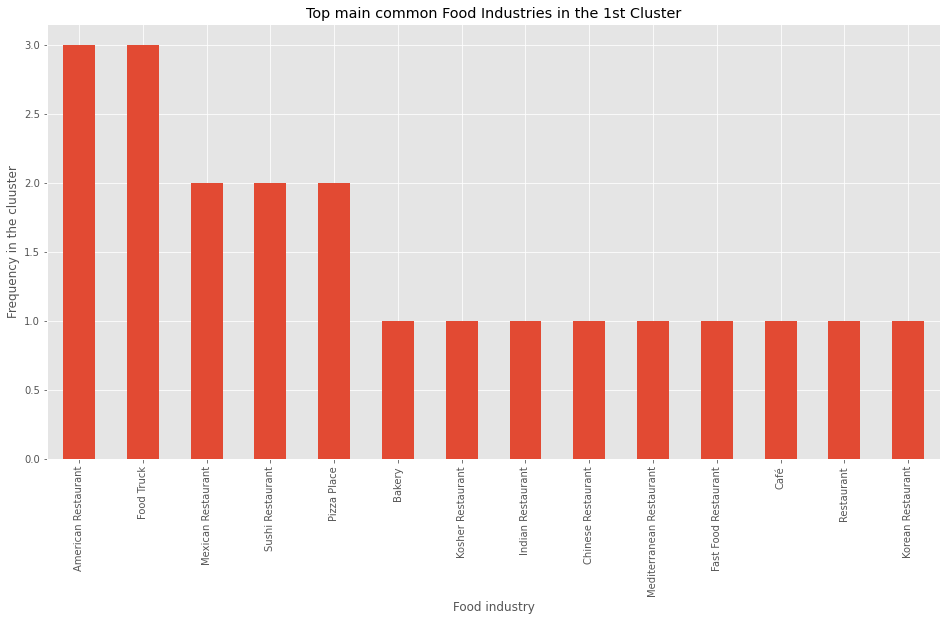

In [81]:
ax= Cluster_1['1st Most Common Venue'].value_counts().plot(kind= 'bar', figsize= (16,8),
                                                      title= 'Top main common Food Industries in the 1st Cluster');
ax.set_xlabel('Food industry');
ax.set_ylabel('Frequency in the cluuster');

                                                      

The top venues in 1st most common venue of the first cluster are american restaurants and food truck followed by sushi, mexican restaurants and pizza places.

#### Cluster 2

In [38]:
la_merged.loc[la_merged['Cluster Labels'] == 1, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Koreatown,Korean Restaurant,Café,Restaurant,Bakery,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Burger Joint,Pizza Place


#### Cluster 3

In [39]:
la_merged.loc[la_merged['Cluster Labels'] == 2, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Chinatown,Chinese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Bakery,Café,Japanese Restaurant,Noodle House,Diner,Fried Chicken Joint,Sandwich Place


#### Cluster 4

In [51]:
Cluster_4 = la_merged.loc[la_merged['Cluster Labels'] == 3, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]
Cluster_4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Adams-Normandie,Sushi Restaurant,Food,Taco Place,Latin American Restaurant,Wings Joint,Ethiopian Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place
4,Alhambra,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,Café,Breakfast Spot,Pizza Place,Food Stand,English Restaurant,Dongbei Restaurant,Donut Shop
7,Altadena,Bakery,Food,Sushi Restaurant,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant
9,Arcadia,Food,Fast Food Restaurant,Donut Shop,Hotpot Restaurant,Thai Restaurant,Bakery,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant
10,Arleta,Food Truck,Bakery,Seafood Restaurant,Burrito Place,Wings Joint,Falafel Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
263,West Whittier-Los Nietos,Burger Joint,Mexican Restaurant,Snack Place,Pizza Place,Food Truck,Empanada Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place
266,Whittier Narrows,Food Truck,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
267,Willowbrook,Fried Chicken Joint,Breakfast Spot,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant
269,Windsor Square,Food Truck,Dumpling Restaurant,Wings Joint,Falafel Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dosa Place,Eastern European Restaurant,Empanada Restaurant


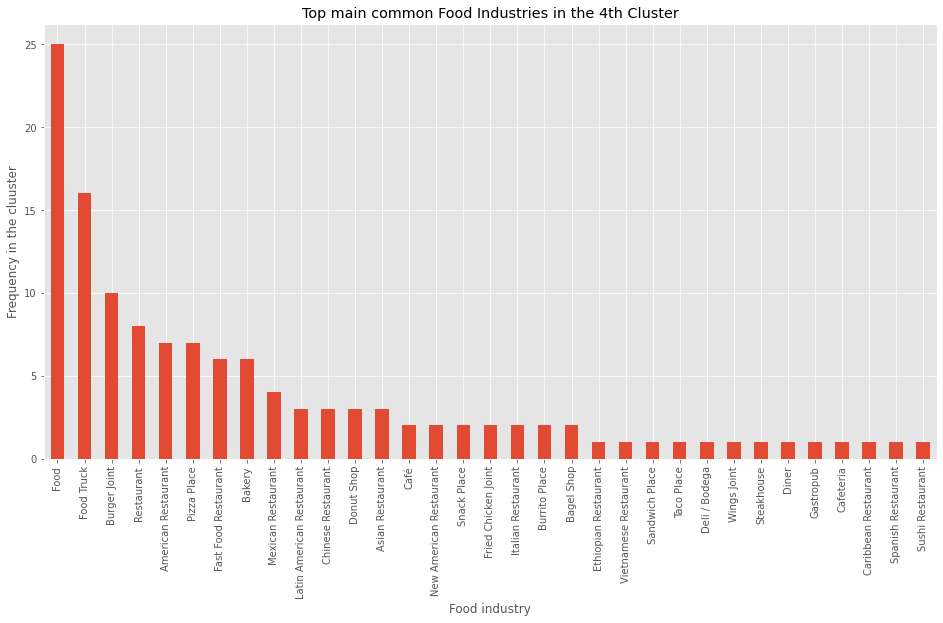

In [80]:
ax= Cluster_4['1st Most Common Venue'].value_counts().plot(kind= 'bar', figsize= (16,8),
                                                      title= 'Top main common Food Industries in the 4th Cluster');
ax.set_xlabel('Food industry');
ax.set_ylabel('Frequency in the cluuster');

                                                      

The top venues in 1nd most common venue of the fourth cluster are food trucks followed by burger joint then american restaurants.

#### Cluster 5

In [53]:
Cluster_5 = la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]
Cluster_5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Arlington Heights,Korean Restaurant,Donut Shop,Mexican Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Food,Seafood Restaurant,Sushi Restaurant,Chinese Restaurant,American Restaurant
13,Atwater Village,Taco Place,Fast Food Restaurant,Mexican Restaurant,Mediterranean Restaurant,Fried Chicken Joint,Restaurant,Food Court,Food,Bakery,Pizza Place
15,Avocado Heights,Mexican Restaurant,Fast Food Restaurant,Diner,Pizza Place,Bakery,Taco Place,English Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop
21,Bellflower,Mexican Restaurant,Pizza Place,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Burger Joint,Donburi Restaurant,Empanada Restaurant,Doner Restaurant,Dongbei Restaurant
22,Bell Gardens,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Donut Shop,New American Restaurant,Seafood Restaurant,Latin American Restaurant,Fried Chicken Joint,Filipino Restaurant,Eastern European Restaurant
27,Burbank,Mexican Restaurant,Fast Food Restaurant,Cuban Restaurant,Sandwich Place,Asian Restaurant,Food Truck,Deli / Bodega,Bakery,Italian Restaurant,English Restaurant
54,Compton,Fast Food Restaurant,Asian Restaurant,Pizza Place,Bakery,Food Court,Chinese Restaurant,Donut Shop,Burger Joint,Sandwich Place,Breakfast Spot
56,La Mirada,Fast Food Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Sandwich Place,Mexican Restaurant,Sushi Restaurant,Steakhouse,Buffet,English Restaurant
57,Covina,American Restaurant,Mexican Restaurant,Burger Joint,Asian Restaurant,Thai Restaurant,Deli / Bodega,Chinese Restaurant,Pizza Place,English Restaurant,Dongbei Restaurant
58,Cudahy,Burger Joint,Fast Food Restaurant,Donut Shop,Chinese Restaurant,Mexican Restaurant,Pizza Place,American Restaurant,Thai Restaurant,Asian Restaurant,Food Stand


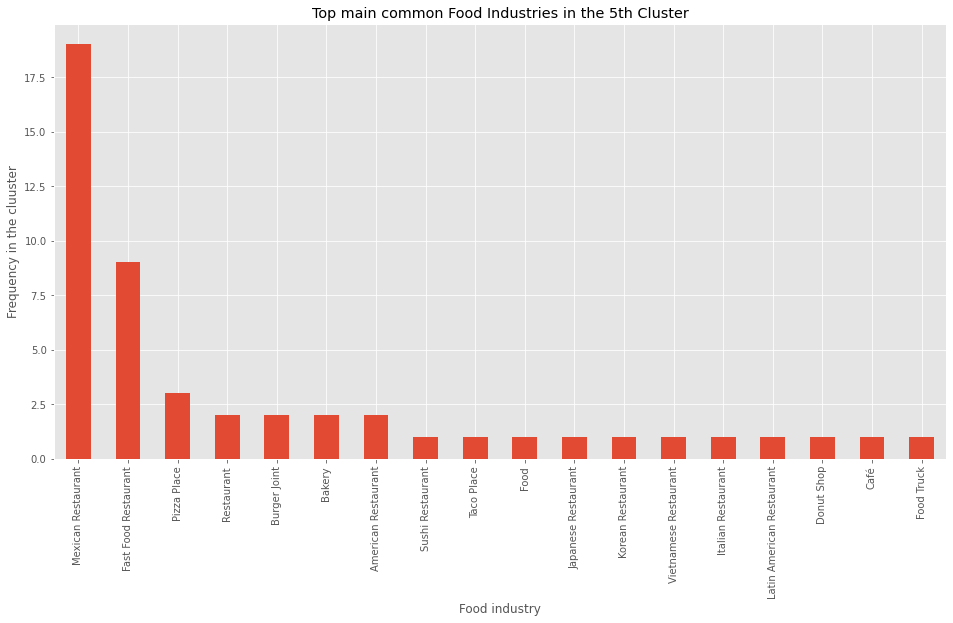

In [79]:
ax= Cluster_5['1st Most Common Venue'].value_counts().plot(kind= 'bar', figsize= (16,8),
                                                      title= 'Top main common Food Industries in the 5th Cluster');
ax.set_xlabel('Food industry');
ax.set_ylabel('Frequency in the cluuster');

                                                      

The top venues in 1st most common venue of the fifth cluster are Mexican restaurants, than fast food followed by pizza places.

**Let's see the top neighborhoods for each category of food that we identified in the big three clusters**

- American Food:

In [68]:
la_grouped.iloc[la_grouped['American Restaurant'].idxmax()]['Neighborhood']

'Hermosa Beach'

- Food Truck

In [69]:
la_grouped.iloc[la_grouped['Food Truck'].idxmax()]['Neighborhood']

'Diamond Bar'

- Pizza Palace

In [70]:
la_grouped.iloc[la_grouped['Pizza Place'].idxmax()]['Neighborhood']

'Echo Park'

- Mexican Food

In [71]:
la_grouped.iloc[la_grouped['Mexican Restaurant'].idxmax()]['Neighborhood']

'Hawaiian Gardens'

<a id='item8'></a>

## Conclusion

The asian towns are famous by their local dishes, The rest of neighborhoods where we can find food related businesses are mainly grouped in three big clusters, and each neighborhood is different than another in way that people visit this neighborhood for a a certain type of food while visiting another one for another type.

Apart from the 71 neighborhoods that should be avoided because they don't have any food related venues, We identified four neighborhoods, each with a distinct food cuisine however Final decision on optimal food industry and location will be made by stakeholders based on specific characteristics of neighborhoods and locations in the three recommended clusters or the four recommended neighborhoods taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.